In [2]:
import configparser
from mapillarywrapper.client import client
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [3]:
"""the object takes a clientid"""
config = configparser.ConfigParser()
config.read('mapillary.cfg')
CLIENT_ID = config['CLIENT-ID']['CLIENT_ID']
example = client.MapClient(CLIENT_ID)

### the trafficinfo method takes several arguments. 
* lowerbbox - A lowerleft coordinate lat/long as a list
* upperbbox - An upperright coordinate lat/long as a list
* value  - (optional) specifies the type of signs, complete list: https://www.mapillary.com/developer/api-documentation/#traffic-signs
    * if the value arguement is empty it'll return all traffic signs in the bounding box
* perpage - a number of how many items to return

BoxPlot from: https://boundingbox.klokantech.com/

In [4]:
# Example
# Los Angeles bbox
lowerbb = [34.051574, -118.347865]
upperbb = [34.090784, -118.309198]
#lowerbb = [33.796069, -117.932502]
#upperbb = [33.803171, -117.924093]
#value='information--bicycles-crossing--g1',
#ten_dict = example.trafficinfo(lowerbb, upperbb,  perpage=1000)

"""
Stop signs
Pedestrian Crossing
bicycle crossings
"""

'\nStop signs\nPedestrian Crossing\nbicycle crossings\n'

In [6]:
df = pd.DataFrame(ten_dict)


In [7]:
# return a dataframe from the variable of the wrapper
#df = pd.read_csv('csvfiles/losangelespedestriancrossing1.csv')
#df1 = pd.DataFrame(ten_dict[1])
display(df)
#df.to_csv('csvfiles/greaterwilshire.csv')

,accuracy,altitude,direction,first_seen_at,last_seen_at,key,layer,value,coordinates,geometry_type
0,1.871151,100.361330,101.824940,2017-07-03T15:12:20.000Z,2017-07-03T15:12:24.000Z,007hdbm44hucp0hd9fjere2qco,trafficsigns,warning--texts--g1,"[-118.31121352387854, 34.08856837092495]",Point
1,1.397209,74.038600,101.868675,2017-07-02T13:22:30.000Z,2017-08-07T07:39:38.000Z,00dkldob6sxrdimpnfcaail2uv,trafficsigns,warning--stop-ahead--g1,"[-118.34115239667757, 34.073645537858674]",Point
2,3.691379,84.785190,205.115750,2017-07-02T13:07:03.000Z,2017-07-02T13:07:04.000Z,00ejxoyg2ewiz1q2ex1adarr9t,trafficsigns,regulatory--stop--g1,"[-118.33408753162702, 34.0817700173129]",Point
3,2.145725,54.914246,121.916370,2017-07-14T14:48:49.000Z,2018-07-19T18:49:32.620Z,00evdv8v14gm36yakh7ridg5ea,trafficsigns,general--traffic-sign--g1,"[-118.32353885300606, 34.05466951332095]",Point
4,1.243991,76.570490,208.088870,2017-07-02T17:05:16.000Z,2017-07-02T17:05:17.000Z,00kv7p6l93j3bgdhfk135fuzfc,trafficsigns,regulatory--no-parking--g2,"[-118.32477339662434, 34.073260206952675]",Point
...,...,...,...,...,...,...,...,...,...,...
9715,8.346005,69.816860,179.178530,2016-10-20T19:18:27.811Z,2016-10-20T19:18:53.128Z,zzocrat6jdvb5o28i25kic1old,trafficsigns,regulatory--turn-left--g2,"[-118.31923271040931, 34.06188852469202]",Point
9716,2.745511,104.031930,274.562840,2014-06-08T01:50:19.000Z,2017-07-19T14:49:26.000Z,zzsmtayqeeckgfimgfyixsf9ws,trafficsigns,information--general-directions--g1,"[-118.31567715707007, 34.09071335609152]",Point
9717,4.040917,86.607230,1.699865,2017-07-02T15:51:40.000Z,2017-07-02T15:51:41.000Z,zzuv915dkw51awg0d40pb0mi6x,trafficsigns,information--end-of-built-up-area--g3,"[-118.32884562653719, 34.08330307817315]",Point
9718,0.780721,74.478470,244.985530,2017-07-02T17:25:18.000Z,2017-07-21T00:22:30.475Z,zzvn378p4yqca9vik506gyujn0,trafficsigns,general--traffic-sign--g1,"[-118.31346051950929, 34.07314479615042]",Point


In [21]:
pedestrians_df = df[df['value'].str.contains('pede') | df['value'].str.contains('bic')]
display(pedestrians_df['value'].unique())
#pedestrians_df.to_csv('csvfiles/pedestrians-bicycle.csv')

array(['regulatory--no-pedestrians--g2', 'regulatory--bicycles-only--g2',
       'regulatory--bicycles-only--g4',
       'warning--pedestrians-crossing--g4',
       'regulatory--bicycles-only--g1',
       'regulatory--dual-path-pedestrians-and-bicycles--g1',
       'regulatory--bicycles-only--g3',
       'regulatory--pedestrians-push-button--g1',
       'warning--bicycles-crossing--g2',
       'regulatory--yield-or-stop-for-pedestrians--g1',
       'regulatory--pedestrians-only--g1',
       'regulatory--no-pedestrians--g4',
       'regulatory--pedestrians-push-button--g2',
       'regulatory--no-bicycles--g2',
       'regulatory--bicycles-push-button--g2',
       'regulatory--shared-path-pedestrians-and-bicycles--g1',
       'complementary--bicycles--g1',
       'complementary--pedestrians-left--g1',
       'regulatory--pedestrians-only--g2',
       'warning--slippery-bicycles--g1',
       'regulatory--bicycles-yield-or-use-signal--g1',
       'warning--bicycles-crossing--g1',
       '

<AxesSubplot:>

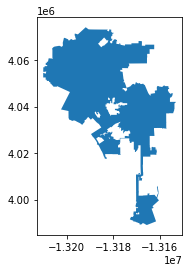

In [5]:
geo_df = gpd.read_file('map_files/CityBoundary.shp')
geo_df.head()
geo_df.plot()